# Assignment 3

## *NESC 3505*

## Instructions
In this assignment you'll get experience in processing raw data, and extracting necessary information to address two experimental hypotheses. 

Write code to answer each of the questions below. Remember to *replace* the lines
`raise NotImplementedError()` with your own code.

In a few cases, the questions ask for written answers rather than code. Those are Markdown cells.

### Assignment Submission

We will collect your notebooks on the due date/time specified on Teams, so there is nothing specific you need to do to submit your assignment - as long as it is on time. If you want your assignment to be counted as late (with 2%/hour penalty), you must send us (both Aaron and Danny) a message on Teams when you are ready for it to be counted as submitted. Be sure not to make changes after you make that request; any subsequent changes will be ignored (based on CoCalc's version tracking/Time Travel).

---

## About the Data for this Assignment

This data file is from a **Flanker experiment** like the one described in the section [Spreadsheets](https://neuraldatascience.io/2/spreadsheets.html) in Chapter 2 of the textbook.  In this experiment, participants had to press either the left or right arrow key to indicate whether an arrow shown on the screen is pointing left or right, respectively. However, the catch is that the centre arrow is "flanked" by two other arrows on each side; these can be pointing the same way as the target arrow (**congruent**): 

![flanker_congruent](images/flanker_congruent@0.75x.png)

or in the opposite direction (**incongruent**):

![flanker_incongruent](images/flanker_incongruent@0.75x.png)

The **flanker effect** is an attentional phenomenon in which responses tend to be slower and less accurate when the flankers are incongruent with the centre target than when they are congruent. 

### Hypotheses
Based on the explanation above, in this experiment we would generate two hypotheses:
- **H1:** RTs will be slower (longer) in the incongruent condition than in the congruent condition
- **H2:** Error rates will be higher in the incongruent condition than in the congruent condition

---
### Q1
Import the libraries we need. This includes pandas (with the alias `pd`) and matplotlib.pyplot (with the alias `plt`):

In [1]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

# This line makes pandas show you all of a DataFrame
pd.set_option('display.max_columns', None)

## Read and examine a data file

In working with a new data set, the first thing you should do is load one data file, and see what it looks like. Does it have a header? If so, what are the column names? Do the column names seem clear in indicating what they contain? Are there any issues, like missing data?

Your first challenge is to read the data file. The data file you want is in a subdirectory, so you need to tell Python where to find it. In coding-world, the set of directories/sub-directories that a file is in is called its **path**, and directory names are separated by the forward slash (`/`) character. Since the first subject ID is `s01` and the data file we want is in a folder named after the subject ID, with the name `[ID].txt`, the full path to this file is: `s01/s01.txt`. This is what we want to provide when loading the DataFrame.

### Q2
In the cell below, read the CSV file for `s01` into a pandas DataFrame called `df`:

In [2]:
# YOUR CODE HERE
df = pd.read_csv('s01/s01.txt')

### Q3 
Look at the head of the DataFrame to see what you loaded:

In [3]:
# YOUR CODE HERE
df.head()

,id\tyear\tmonth\tday\thour\tminute\tgender\tage\thandedness\twait\tblock\ttrial\ttarget_location\ttarget\tflankers\trt\tresponse\terror\tpre_target_response\tITI_response\ttarget_on_error
0,001\t2015\t05\t22\t11\t30\tm\t25\tr\t3.24\tpra...
1,001\t2015\t05\t22\t11\t30\tm\t25\tr\t3.24\tpra...
2,001\t2015\t05\t22\t11\t30\tm\t25\tr\t3.24\tpra...
3,001\t2015\t05\t22\t11\t30\tm\t25\tr\t3.24\tpra...
4,001\t2015\t05\t22\t11\t30\tm\t25\tr\t3.24\tpra...


Well, that doesn't look right, does it? We'll need to pass some additional arguments to `pd.read_csv()` in order to get it right.

The issue is that our input file is a text file, with the extension `.txt`. The function `pd.read_csv()` assumes that the input you give it is a CSV (comma-separated values) file, which uses commas to separate the entries in each row that should be in separate columns. However, our text files use tabs, rather than commas, to separate the columns. We can tell this because in the output above, the lines all have a bunch of "`\t`"s in them. The string `\t` is a special code used in many programming languages (and Unix/linux systems) to indicate a tab. The backslash (`\`) is a special **escape character** that tells Python not to interpret the next character literally as a string, but as a code.

Take a look at [the API for pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to get insight on how to tell pandas to use tabs as the column separators. You'll see that there's an optional argument, `sep=`, along with a note that pandas assumes by default that columns are separated by commas. To override this default, we need to use `sep='\t'`. 

### Q4

In the cell below, write code to read the `s01` data with tab as the separator,  and assign it to `df`.

Then, show the head of `df` again

In [4]:
# YOUR CODE HERE
df = pd.read_csv('s01/s01.txt', sep='\t')
df.head()

,id,year,month,day,hour,minute,gender,age,handedness,wait,block,trial,target_location,target,flankers,rt,response,error,pre_target_response,ITI_response,target_on_error
0,1,2015,5,22,11,30,m,25,r,3.24,practice,1,left,black,incongruent,NaN,NaN,NaN,False,False,0.023
1,1,2015,5,22,11,30,m,25,r,3.24,practice,2,right,black,incongruent,0.550,black,True,False,False,0.023
2,1,2015,5,22,11,30,m,25,r,3.24,practice,3,up,white,incongruent,0.565,white,True,False,False,0.024
3,1,2015,5,22,11,30,m,25,r,3.24,practice,4,up,black,congruent,0.453,black,True,False,False,0.024
4,1,2015,5,22,11,30,m,25,r,3.24,practice,5,down,black,congruent,0.442,black,True,False,False,0.023


OK, that should look much better! 

pandas automatically assumes that the first row in an input data file is the column headers (i.e., column names). You should examine the column labels and think about what each column might represent. Some headers may be harder to understand the meaning of than others. Ideally, all column names would be "transparent" - easy to understand by others - but in science, you often need to know something about where the data came from to undersatand all the labels. 

In looking at the header you may notice one issue with this data file: there are missing values (`NaN`) in the `rt`, `response`, and `error` columns. This is something we'll deal with below.

You'll also see that there is a `block` column, which has a value of `practice` for all of the first 10 rows, and a `trial` column that increases sequentially. Many experiments are composed of a series of blocks, which are sets of trials. Blocks might simply be a way of setting up the experiment so that there are breaks (e.g., a break at the end of every block of trials), or the blocks may represent different experimental conditions. At any rate, you can infer from these columns that the experiment that generated these data was organized into blocks and trials. You can also likely guess that after the `practice` block are additional blocks, probably not called "practice". You can confirm this by calling the head of the DataFrame again, but this time showing more rows.

### Q5
In the cell below, write code to print out the first 50 rows of `df`

In [5]:
# YOUR CODE HERE
df.head(50)

,id,year,month,day,hour,minute,gender,age,handedness,wait,block,trial,target_location,target,flankers,rt,response,error,pre_target_response,ITI_response,target_on_error
0,1,2015,5,22,11,30,m,25,r,3.240,practice,1,left,black,incongruent,NaN,NaN,NaN,False,False,0.023
1,1,2015,5,22,11,30,m,25,r,3.240,practice,2,right,black,incongruent,0.550,black,True,False,False,0.023
2,1,2015,5,22,11,30,m,25,r,3.240,practice,3,up,white,incongruent,0.565,white,True,False,False,0.024
3,1,2015,5,22,11,30,m,25,r,3.240,practice,4,up,black,congruent,0.453,black,True,False,False,0.024
4,1,2015,5,22,11,30,m,25,r,3.240,practice,5,down,black,congruent,0.442,black,True,False,False,0.023
5,1,2015,5,22,11,30,m,25,r,3.240,practice,6,left,black,neutral,0.550,black,True,False,False,0.023
6,1,2015,5,22,11,30,m,25,r,3.240,practice,7,left,black,congruent,0.433,black,True,False,False,0.024
7,1,2015,5,22,11,30,m,25,r,3.240,practice,8,down,white,incongruent,0.502,white,True,False,False,0.023
8,1,2015,5,22,11,30,m,25,r,3.240,practice,9,left,white,neutral,0.430,white,True,False,False,0.023
9,1,2015,5,22,11,30,m,25,r,3.240,practice,10,down,black,incongruent,0.639,black,True,False,False,0.023


### Q6 (a)

Another way to look at what might change over the course of experiment (like blocks) is to view the tail of the DataFrame. <br>
Do this in the cell below, to view the last 50 trials in the DataFrame.

In [6]:
# YOUR CODE HERE
df.tail(50)

,id,year,month,day,hour,minute,gender,age,handedness,wait,block,trial,target_location,target,flankers,rt,response,error,pre_target_response,ITI_response,target_on_error
142,1,2015,5,22,11,30,m,25,r,1.599,4,15,down,black,congruent,0.679,black,True,False,False,0.023
143,1,2015,5,22,11,30,m,25,r,1.599,4,16,right,black,congruent,0.538,black,True,False,False,0.023
144,1,2015,5,22,11,30,m,25,r,1.599,4,17,down,black,neutral,0.566,black,True,False,False,0.023
145,1,2015,5,22,11,30,m,25,r,1.599,4,18,left,white,neutral,0.559,white,True,False,False,0.023
146,1,2015,5,22,11,30,m,25,r,1.599,4,19,right,white,congruent,0.501,white,True,False,False,0.023
147,1,2015,5,22,11,30,m,25,r,1.599,4,20,left,white,congruent,0.399,white,True,False,False,0.023
148,1,2015,5,22,11,30,m,25,r,1.599,4,21,down,black,neutral,0.656,black,True,False,False,0.024
149,1,2015,5,22,11,30,m,25,r,1.599,4,22,left,black,neutral,0.470,black,True,False,False,0.023
150,1,2015,5,22,11,30,m,25,r,1.599,4,23,right,black,incongruent,0.478,black,True,False,False,0.023
151,1,2015,5,22,11,30,m,25,r,1.599,4,24,down,white,neutral,0.537,white,True,False,False,0.024


### Q6 (b)

Now, write *one line* of code for each of the following steps:
- import the `glob` package
- use `glob` to list all the files that start with `s`, followed by any two characters (i.e., any subject ID number), followed by `.txt`
- read in each of those files in a way that creates a *list* of pandas DataFrames
- merge the data from all subjects into a single DataFrame called `df`
- show that it worked by viewing 8 random rows from `df`

<div class="alert alert-block alert-info">
No cheating! Although you can put multiple commands on one line with `;` between them, that's not what we mean by "one line of code"</div>

In [7]:
# YOUR CODE HERE
import glob
files = glob.glob('*/s??.txt')
df_list = [pd.read_csv(f, sep='\t') for f in files]
df = pd.concat(df_list)
df.sample(8)

df = df.reset_index()

## Missing Values?

As noted above, there are some `NaN` ("Not a Number") values in the data. It would be good to get a summary of how many missing values there are in the data set. You can do this with the `pd.isna()` function, which will output `True` or `False` for every cell of the DataFrame. That alone is not any more useful than looking at the original data, however you can *chain* that command with the `.sum()` method to get the total number of `True` values in each column (remember that in Python, `True` is treated as `1` and `False` as `0`). 

### Q7
Do this below: run the `.isna()` on `df` and chain it with the `.sum()` method.

In [8]:
# YOUR CODE HERE
df.isna().sum()

index                  0
id                     0
year                   0
month                  0
day                    0
hour                   0
minute                 0
gender                 0
age                    0
handedness             0
wait                   0
block                  0
trial                  0
target_location        0
target                 0
flankers               0
rt                     2
response               2
error                  2
pre_target_response    0
ITI_response           0
target_on_error        0
dtype: int64

## Data Cleaning

Next, we need to decide how to deal with the `NaN`s. It turns out these are just trials on which the participant didn't make a button press response. We have (at least) three options:
1. Leave these as-is.
2. Remove all rows with missing data
3. Replace (impute) the missing values with actual values.

Imputation of missing data is sometimes done in psychology and neuroscience studies, especially if we have lots of variables, and only one data point per subject (e.g., a score on a standardized test completed by each subject). Usually the reason for imputing data is that statistical methods such as ANOVAs do not allow for missing data, so without imputation we might have to discard a subject's entire data set, even if they are only missing data from one test among many that were administered.

However, in the current case, it doesn't make sense to impute (which is essentially guessing) a reaction time on a trial when a participant didn't make a response at all. So we could remove those trials entirely. On the other hand, we might want to report how many trials, on average, our participants failed to respond to, or we might want to treat them as errors. 

Although missing data is problematic for things like ANOVAs, it is not an issue for EDA summary statistics in pandas. pandas is written to gracefully handle missing data. Indeed, [pandas' documentation explicitly states](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#calculations-with-missing-data) that missing data is ignored in computing values such as the mean and standard deviation.

So, we could probably safely keep the `NaN`s in the data. On the other hand, pandas does offer a `.dropna()` method, so this is a great opportunity to [learn to use it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)! 

### Q8
Use the pandas `.drop_na()` method to drop any rows containing any `NaN` values:

In [9]:
# YOUR CODE HERE
df = df.dropna()

## Remove practice trials

We noted earlier that the experiment was organized into blocks. The first of these was a practice block, which we'll want to ignore. The point of practice is to give participants a chance to figure out the experiment (which is a bit complicated in this case), and make some errors, ask questions, etc., *before* running the experiment where we hope their data will be a valid reflection of their performance. So we should discard all the practice trials prior to doing EDA. 

You can use the pandas `.unique()` method to see a list of all the unique values in a particular column.

### Q9
In the cell below, show the unique values in the `block` column in this dataset:

In [10]:
# YOUR CODE HERE
print('Unique values in the block column:', df["block"].unique())

Unique values in the block column: ['practice' '1' '2' '3' '4' '5']


### Q10
A simple way to remove all the rows from the practice block is actually to simply keep all the values that *don't* have the value of 'practice' in the `block` column. Type the command below into the next cell, and add the Python "not equals" operator in the appropriate place to do this.

    df = df[df.block  'practice']
    
Remember that this syntax means, "`df` where `df` is not equal to `'practice'`"    

In [14]:
# YOUR CODE HERE
df = df[df.block !='practice']

### Q11
Confirm that there are no practice trials left in `df`, by again using the `.unique()` method:

In [15]:
# YOUR CODE HERE
print('Unique values in the block column:', df["block"].unique())

Unique values in the block column: ['1' '2' '3' '4' '5']


# Reaction Times

## Convert to milliseconds
The `rt` column contains reaction times (RTs) on each trial. These are stored in seconds. A more common unit for reporting RTs in behavioural research is milliseconds (thousandths of a second). 

### Q12
Broadcast a new column in `df` called `rt_ms`, by multiplying the values in `rt` by 1000:

In [16]:
# YOUR CODE HERE
df['rt_ms'] = df['rt'] * 1000

<div class="alert alert-block alert-info">
In the rest of this assignment, use <code>rt_ms</code> in any question that asks about RT.
    </div>

## Examining the RT distribution

In most behavioural studies, RTs are not normally distributed. Recall that in a normal distribution (a "bell curve") has no *skew*. That is to say, there are typically an equal number (and distribution) of values above and below the mean. RTs tend to be skewed, because there are fundamental limits on how fast a human can process information and make a motor response, which sets a lower limit on RTs. In some experiments, participants can wait as long as they want to make a response. In other experiments, there is a limited response window, but in both cases there tends to be a wider tail on the right side of the distribution, when you plot it. 

### Q13
Let's see if our RT data is skewed. First, use the pandas method `.describe()` to display descriptive stats for the RT data:

In [18]:
# YOUR CODE HERE
df["rt_ms"].describe()

count    480.000000
mean     468.970833
std      108.437119
min      285.000000
25%      390.000000
50%      453.000000
75%      517.250000
max      956.000000
Name: rt_ms, dtype: float64

You can see some evidence of skewness by comparing the difference between the minimum value in the data with the median (`50%`), and the difference between the maximum value and the mean. 

### Q14
Explain how the output of `.describe()` shows that the data are skewed, and in which direction.

Because the output of .describe() shows the mean is greater than the median (468.970833 > 453.0), the data is skewed to the right (positive skew). The difference between the maximum value and the median is also greater than the difference between the minimum value and the mean (487.029167 > 183.970833), showing that the data is skewed to the right towards the maximum (positive skew).

### Q15 (a)
Next, plot a histogram of RTs, using the pandas `.plot()` method:

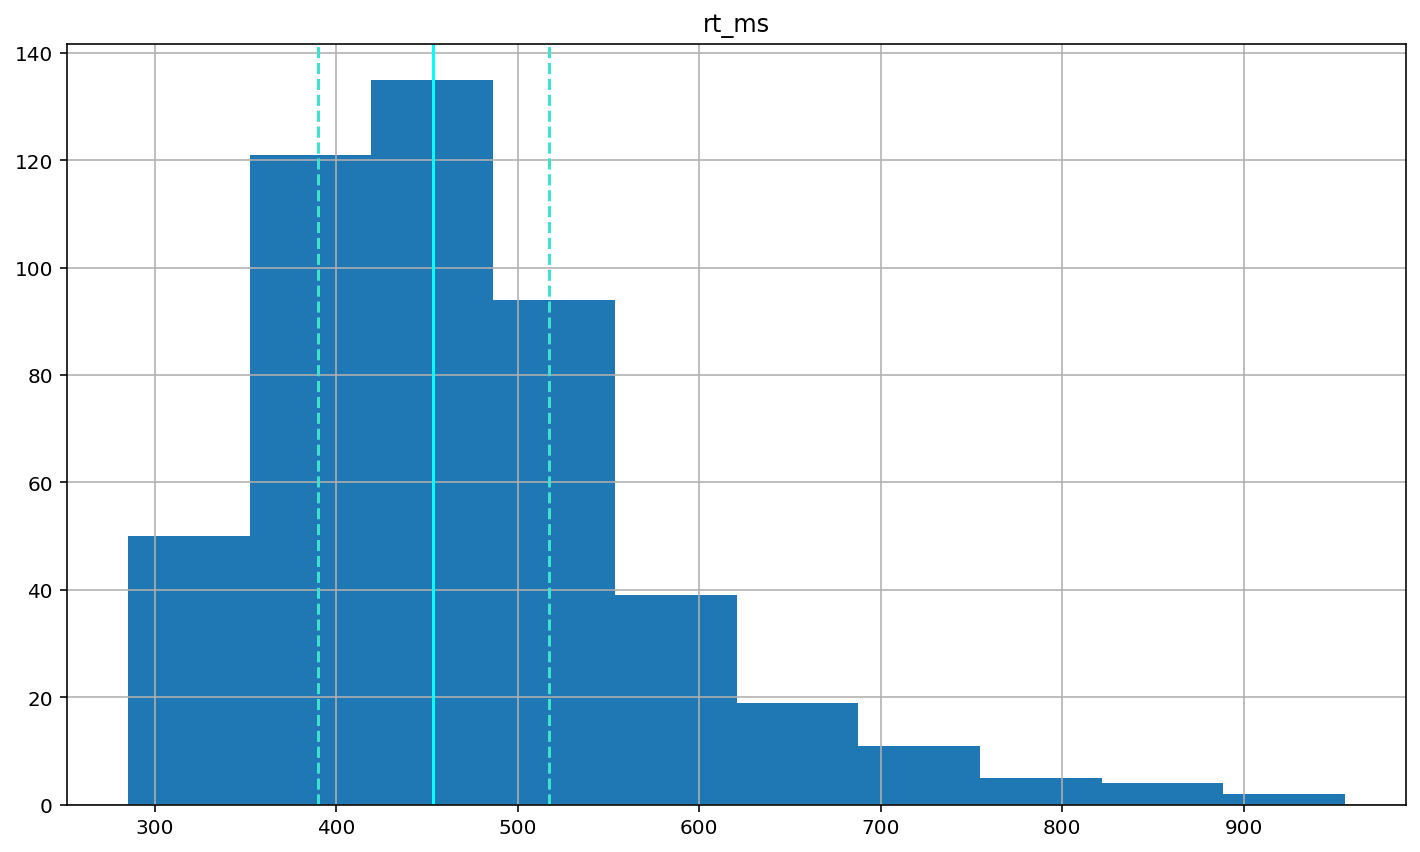

In [20]:
# put your plotting code here
# YOUR CODE HERE
df.hist(column="rt_ms")


# Don't change the rest of this code - it's doing some formatting for you
# add a solid line at the median and dashed lines at the 25th and 75th percentiles (done for you)
plt.axvline(df['rt_ms'].describe()['25%'], 0, 1, color='turquoise', linestyle='--')
plt.axvline(df['rt_ms'].median(), 0, 1, color='cyan', linestyle='-')
plt.axvline(df['rt_ms'].describe()['75%'], 0, 1, color='turquoise', linestyle='--')

# Remember to use plt.show() to see your plots (often they show anyway, but with some garbagy text at the top)
plt.show()

### Q15 (b) 

Does the histogram look normally distributed, or skewed? Explain.

This histogram is positively/right skewed. This is seen in the histogram where there are more data points around the left tail, and the right tail is longer. This means that the mean is greater than the median.

### Q16 (a) 
Plot the normed cumulative density function (CDF; also sometimes called cumulative *distribution* function) of the RTs:

In [65]:
# put your plotting code here
# YOUR CODE HERE
import numpy as np
rt_ms = df["rt_ms"]
cdf_rt_ms = Cdf(rt_ms)
cdf_rt_ms.plot()

# add a solid line at the median and dashed lines at the 25th and 75th percentiles (done for you)
plt.axvline(df['rt_ms'].describe()['25%'], 0, 1, color='turquoise', linestyle='--')
plt.axvline(df['rt_ms'].median(), 0, 1, color='cyan', linestyle='-')
plt.axvline(df['rt_ms'].describe()['75%'], 0, 1, color='turquoise', linestyle='--')

plt.show()

NameError: name 'Cdf' is not defined

### Q16 (b) 

How can you tell from the CDF whether or not the data are skewed?

You can tell from the CDF whether or not the data are skewed by looking at whether the plot is shifter to the right or left. If the plot is shifted to the right like ours shown above, it shows right/positively skewed data. If the plot is shifted to the left, it would show left/negatively skewed data.

## RT transformations

While the skew in the RT data makes sense, for the reasons described above, it's problematic when running statistics on the data. This is because many conventional statistical tests, like *t*-tests and ANOVAs, assume that the data are normally distributed. Using skewed data can cause unreliable results. 

For this reason, many researchers apply some transformation to RTs to make their distribution more normal (statistically normal, that is). A common one is to take the logarithm of the RT values: $log(RT)$; another is to take the inverse: $1/RT$.

### Q17
The code below will add a column to your DataFrame called `log_rt`. Add a line of code to plot the histogram of the log-transformed data:

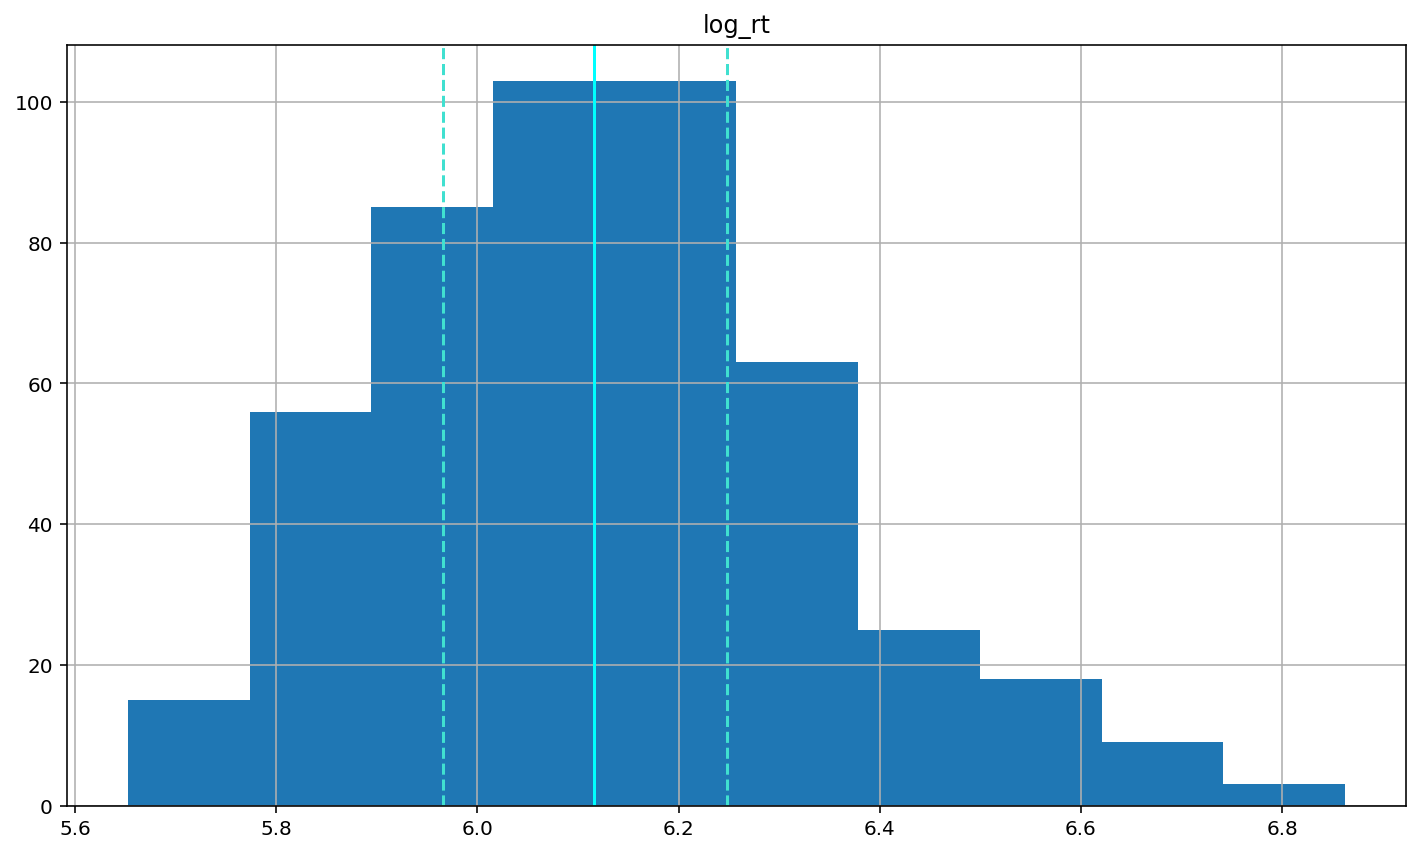

In [66]:
# Some helpful code is already provided
import numpy as np

# log-transform the rt data (done for you)
df['log_rt'] = np.log(df['rt_ms'])

# put your plotting code here
# YOUR CODE HERE
df.hist(column="log_rt")

# add a solid line at the median and dashed lines at the 25th and 75th percentiles (done for you)
plt.axvline(df['log_rt'].describe()['25%'], 0, 1, color='turquoise', linestyle='--')
plt.axvline(df['log_rt'].median(), 0, 1, color='cyan', linestyle='-')
plt.axvline(df['log_rt'].describe()['75%'], 0, 1, color='turquoise', linestyle='--')

# Remember to always use plt.show() to see your plots (they often show anyway, but with some garbagy text at the top)
plt.show()

### Q18
Broadcast a column called `rt_inv`, containing the inverse transform of RT ($1/rt$)

In [74]:
# YOUR CODE HERE
df['rt_inv'] = np.reciprocal(df['rt_ms'])

### Q19
Plot the histogram of `invrt`

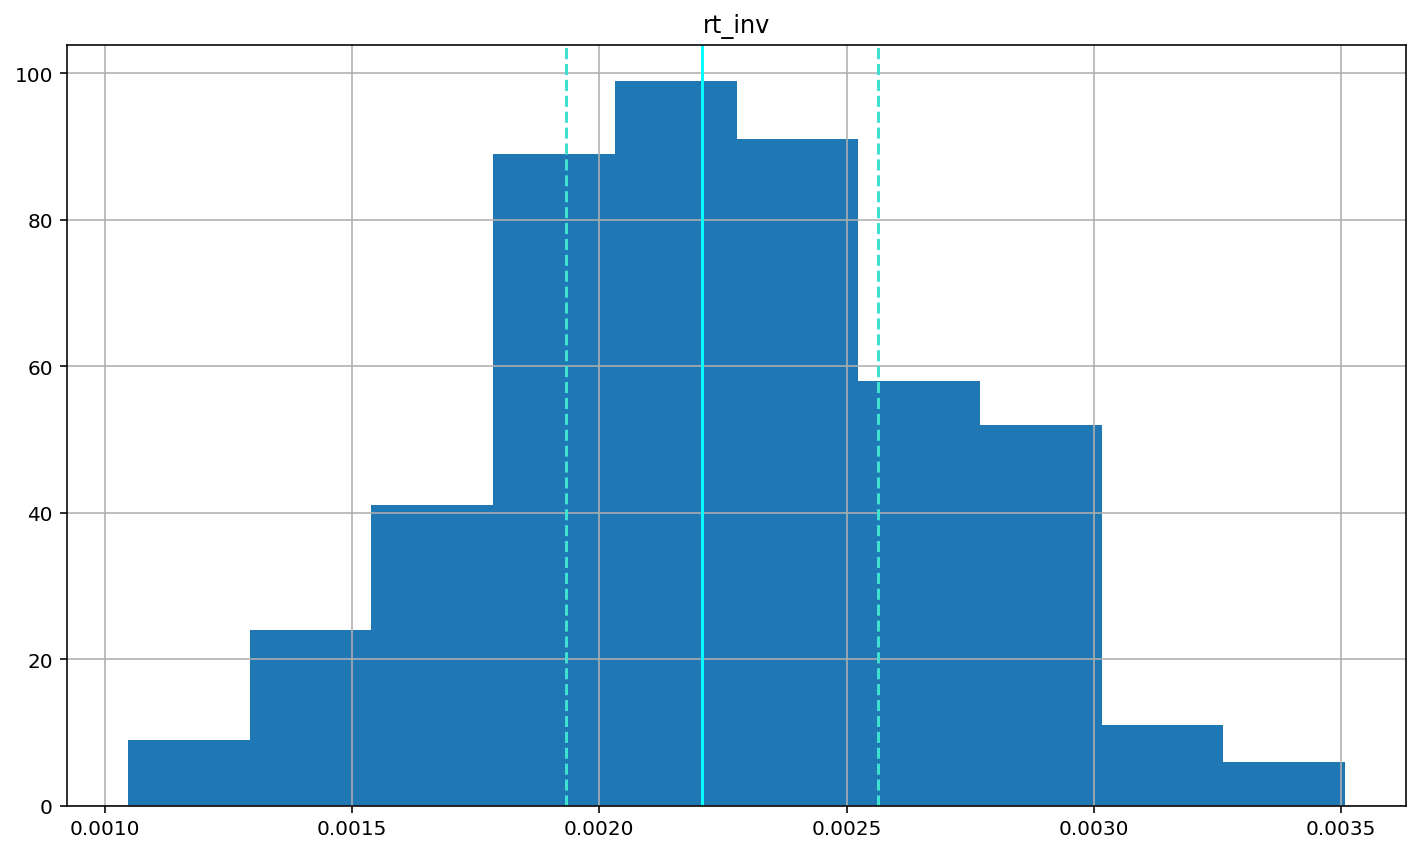

In [76]:
# YOUR CODE HERE
df.hist(column="rt_inv")

# add a solid line at the median and dashed lines at the 25th and 75th percentiles (done for you)
plt.axvline(df['rt_inv'].describe()['25%'], 0, 1, color='turquoise', linestyle='--')
plt.axvline(df['rt_inv'].median(), 0, 1, color='cyan', linestyle='-')
plt.axvline(df['rt_inv'].describe()['75%'], 0, 1, color='turquoise', linestyle='--')

# Again, remember to use plt.show(). Students often forget this helpful step.
plt.show()

### Q20
Does one of these two transforms produce a more normal-looking distribution? If so, which one? 

The inverse of rt produces a more normal-looking distribution than the log of rt. 

## Grouping by experimental condition

Recall that these data are from a "flanker" experiment in which participants had to respond with a left or right button press, depending on whether the target (centre) arrow pointed left or right. The target arrow was flanked with two arrows on either side that were either congruent (pointed in same direction) or incongruent (opposite direction). 

Our focus in exploring the data will be on errors and reaction times (RTs).

### Q21
Let's start by finding out how many trials we have in each condition. Use the `.groupby()` method, chained with the `.count()` method, to group the DataFrame by `flankers` and count the number of data points (rows) in each flanker condition.

In [79]:
# YOUR CODE HERE
df.groupby('flankers').count()

,index,id,year,month,day,hour,minute,gender,age,handedness,wait,block,trial,target_location,target,rt,response,error,pre_target_response,ITI_response,target_on_error,rt_ms,log_rt,rt_inv
flankers,,,,,,,,,,,,,,,,,,,,,,,,
congruent,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
incongruent,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
neutral,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240


You should get a DataFrame with two rows (congruent and incongruent), and a count in each of the columns of the original DataFrame. This is a bit redundant, but for now good enough to tell us how many trials we have per condition.

But you might notice something strange in the output above. Surprise! There's a third condition: neutral. 

### Q22
We're just going to ignore the neutral condition for now, so remove all trials (rows) from `df` that have a value of `neutral` in the `flankers` column. Do this the same way you removed practice trials earlier.

In [82]:
# YOUR CODE HERE
df = df[df.flankers !='neutral']

### Q23

Generate a table showing mean RT in milliseconds for each flanker condition.

In [100]:
# YOUR CODE HERE
df.groupby('flankers')['rt_ms'].mean()

flankers
congruent      431.183333
incongruent    491.066667
Name: rt_ms, dtype: float64

### Q24
Now generate a table for accuracy (the `error` column). Note that in this experiment (contrary to their use in Assignment 2), values of `True` in this column indicate *correct* responses, and `False` indicates an error. Also remember that Python treats `True` as having a value of 1, and `False` as 0, when applying mathematical operations to Boolean values. So if you sum all the True/False values in a Boolean column, you will get the number of `True` rows.

In the cell below, show the number of correct trials in each condition. 

In [146]:
# YOUR CODE HERE
df.error.sum()

216

### Q25
Now show the accuracy *rate* - i.e., the proportion of trials that were correct in each condition. Since values in the `error` column are Boolean (either `0` or `1`), the `.mean()` method will produce the proportion of rows that are `True`.

In [166]:
# YOUR CODE HERE
(df.error.sum()/df.groupby('error').size())/100

error
False    0.09
True     0.01
dtype: float64

## Visualization with Seaborn

We've been doing a fair bit of EDA already, such as looking at histograms, descriptive statistics, and RTs by condition. But, visualization of data is often more helpful than tables like the ones above. 

For all of the remaining plots, use Seaborn functions.

### Q26

Import the Seaborn package with the alias `sns`

In [109]:
# YOUR CODE HERE
import seaborn as sns
sns.set_style('white')

### Q27 (a)
Generate a histogram plot of the RT data *in milliseconds*, with different colors for each flanker condition

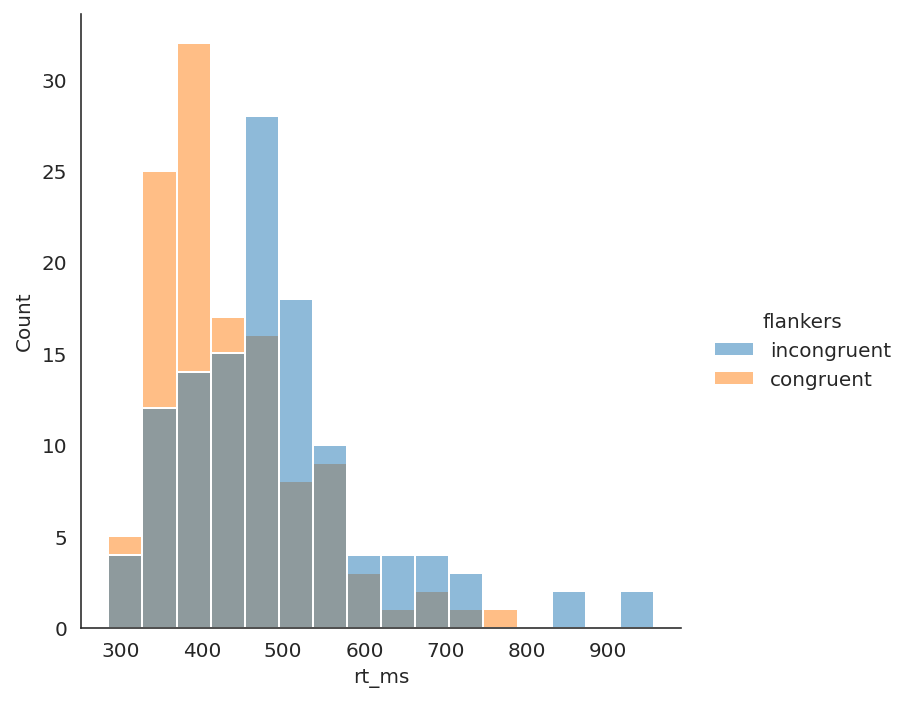

In [110]:
# YOUR CODE HERE
sns.displot(data=df, x='rt_ms', hue = 'flankers')
plt.show()

### Q27 (b)
Generate a histogram plot of the *log* RT data, with different colors for each flanker condition

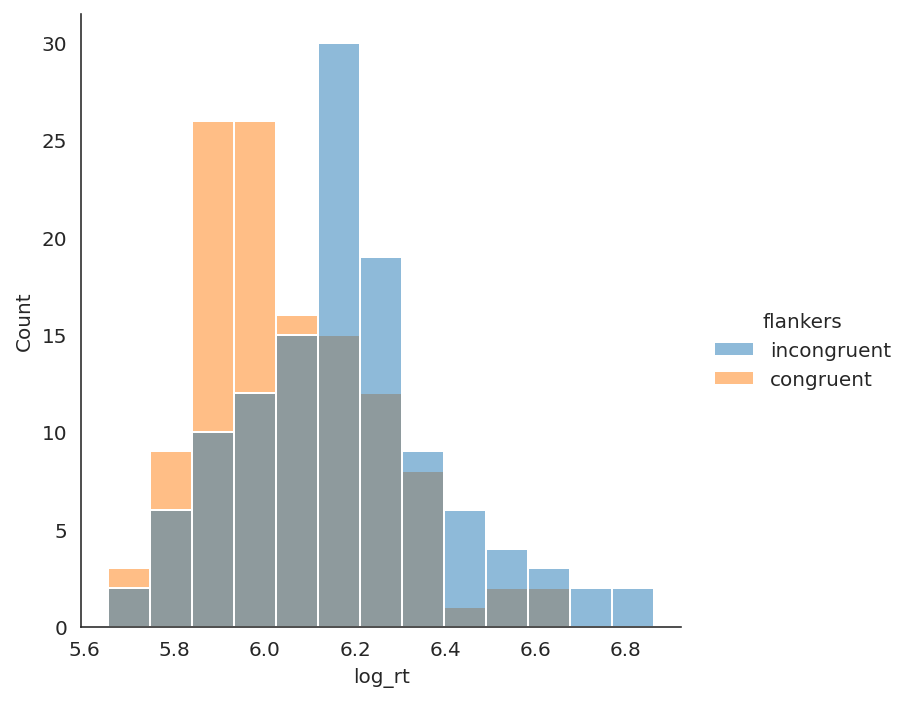

In [111]:
# YOUR CODE HERE
sns.displot(data=df, x='log_rt', hue = 'flankers')
plt.show()

### Q28 (a)

Box plots are another nice way to look at the distribution of variables, and make some visual comparisons between conditions. Generate a box plot of the RT data *in milliseconds*, with flanker condition on the *x* axis.

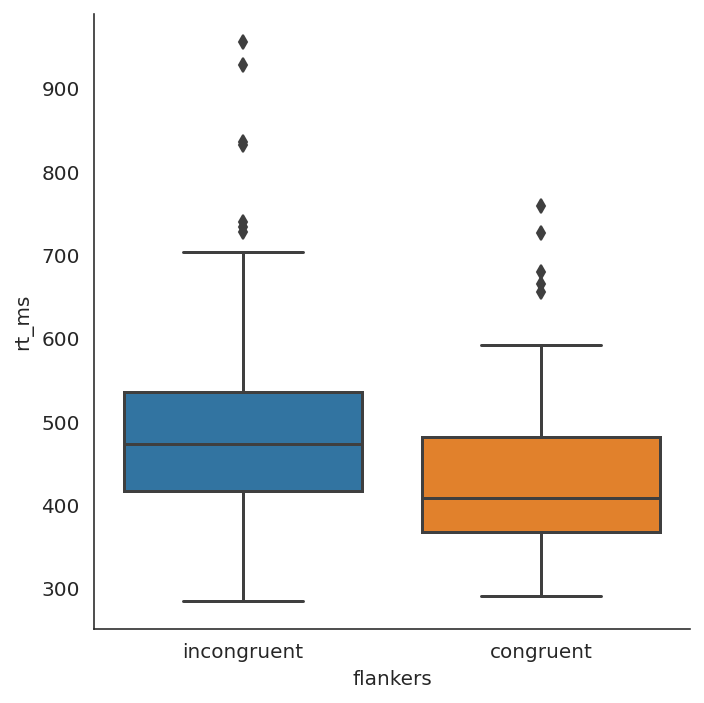

In [112]:
# YOUR CODE HERE
sns.catplot(kind='box',
            data=df,
            x='flankers', y='rt_ms')

plt.show()

### Q28 (b)

Box plots are another nice way to look at the distribution of variables, and make some visual comparisons between conditions. Generate a box plot of the *log RT* data, with flanker condition on the *x* axis.

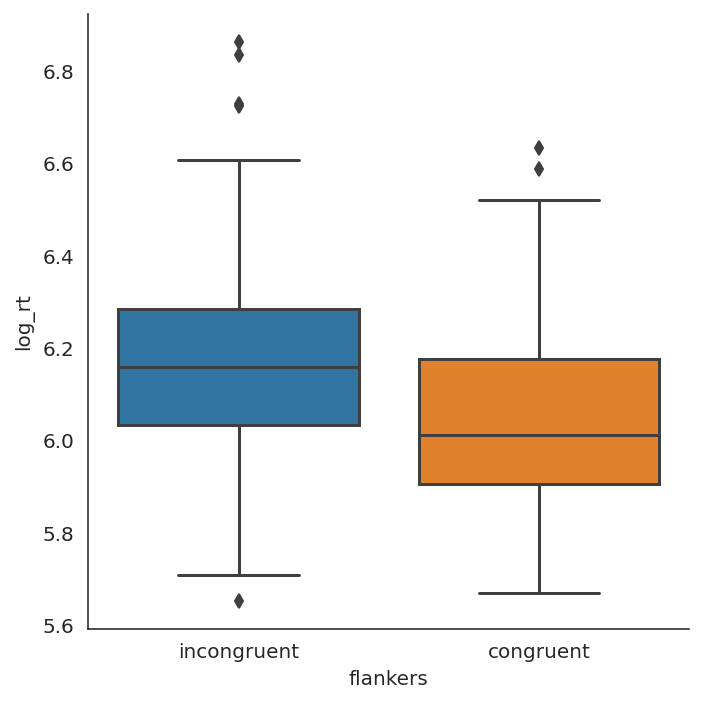

In [113]:
# YOUR CODE HERE
sns.catplot(kind='box',
            data=df,
            x='flankers', y='log_rt')

plt.show()

### Q29

Comparing the two plots above (Q27 & 28) to the table of mean RTs you generated in Q23:
1. How do the plots give you a richer understanding of the data than the table from Q23?
1. How does the distribution of values in each flanker condition change between the millisecond and log RT plots? Which representation of the data makes it easier to see possible differences between conditions?
1. What conclusions can you derive from the two plots, with respect to whether RTs in the two conditions are similar or different?

1. The plots give us a richer understanding of the data that was presented from the table in Q23 because box plots show us summary statistics (i.e. min, Q1, median, Q3, max) as well as outliers. This gives us a better sense of the distribution of the data and how all of it impacts the results, rather than just a single number (the mean). Measures of spread generally give a better visual understanding than measures of central tendencies.
2. The distribution of values in each flanker condition is slightly larger on the log RT plot than the ms RT plot. I believe that it is easier to see possible differences between conditions because the error bars are similar, that way looking at the box plots is more telling of the summary statistics.
3. We can conclude from the 2 plots that the reaction times are different between the flanker conditions. We can also conclude that there is more variation in reaction times for incongruent flankers than for congruent flankers.

### Q30 (a)
Use Seaborn to generate a bar plot of accuracy in each condition (remember that accuracy is in the column labelled `error`).

In [168]:
# YOUR CODE HERE
sns.catplot(kind='box',
            data=df,
            x='error',
            y=)

plt.show()

SyntaxError: invalid syntax (4012777734.py, line 5)

### Q30 (b)

Coment on the size of the error bars in the plot of accuracy (the black bars at the top-centre of each bar, that represent variance). Are they different? Why do you think that is? Is there any restriction on the range of possible accuracy values?

I could not figure out how to do this, therefore I cannot comment on the size of the error bars in the plot of accuracy, but based on data, I would assume that there would be a higher accuracy for the congruent flankers because they are less 'confusing' and therefore create raster reaction time and better accuracy.

### Q31 (a)
Use Seaborn to generate a *box* plot of accuracy in each condition. (*Note*: This will look weird! Probably not what you are expecting...)


In [169]:
# YOUR CODE HERE
sns.catplot(kind='box',
            data=df,
            x='error',
            y=)

plt.show()

SyntaxError: invalid syntax (1922842145.py, line 5)

### Q31 (b)

What is weird about the box plot of accuracy data? Why do you think that is? (Hint: think about what the data values actually are, and what "variance" means in this context)

Again, I could not figure out this question, but if I had to guess based on data, I think what would be weird about it is that there are only 2 values for accuracy (True or False). Because there are only 2 possible values, the box plot wouldn't mean much in the sense that variation would be only between 0 and 1.

---
## Interpretation

Recall that the hypotheses for this experiment were:
- **H1:** RTs will be longer (slower) in the incongruent condition than in the congruent condition
- **H2:** Error rates will be higher in the incongruent condition than in the congruent condition


### Q32
Of course, three participants likely aren't a representative sample of the population, so our sample size isn't enough to answer the question with any confidence, and we haven't performed any statistics. But simply on the basis of the xploratory data analysis (EDA) you've done here — examining means and distributions  — what can you conclude, and how/why? Specifically, are the data from these three participants consistent with each hypothesis? 

The data from these three participants were consistent with each hypothesis. From the box plots and histograms created, we can see that reaction times were greater for the incongruent flanker than for the congruent flanker.
I would assume that the second hypothesis is correct as well based on data. Because the incongruent flanker condition confused participants, it took more time for them to react, and ther

---
# The End